In [1]:
# Struktury oraz moduły
from kdtree.kdtree import KDtree
from kdtree.kdtree_test import runtests
from kdtree.kdtree_visualizer import KDtreeVisualizer, visualize_queried_points
from quadtree.quad import Quad
from automatic_tests import runtests_all
from gui_creator import create_gui
from visualizer.main import Visualizer
import generators

# Pozostałe biblioteki
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
np.set_printoptions(legacy='1.25')

### Wprowadzenie

Ten plik Jupyter Notebook został stworzony, aby zapewnić wygodny interfejs do prezentacji oraz wizualizacji funkcjonowania KD-tree i QuadTree. Posłuży on także jako narzędzie do przetestowania poprawności implementacji powyższych struktur oraz porównania ich efektywności dla poszczególnych zbiorów danych. Kod poszczególnych struktur i modułów znajduje się w plikach źródłowych. Szczegóły dotyczące implementacji obu drzew oraz instrukcja dotycząca ich wykorzystania przez użytkownika, zostały zamieszczone w dokumentacji do projektu.

### Testy poprawności implementacji
Na początek sprawdzimy, czy implementacja KD-tree przechodzi zdefiniowane ręcznie testy jednostkowe (dla wielu wymiarów). Zbiory testowe zawarte są w pliku kdtree_tests.py, który stanowi część pakietu kdtree.

In [2]:
# KD-tree test
runtests()

Test 0: zaliczony!
Test 1: zaliczony!
Test 2: zaliczony!
Test 3: zaliczony!
Test 4: zaliczony!
Test 5: zaliczony!
Test 6: zaliczony!
Test 7: zaliczony!
Test 8: zaliczony!
Test 9: zaliczony!


Następnie wykonamy testy integralnościowe obu struktur danych. W tym celu zostaną wygenerowane zbiory testowe o różnych charakterystykach i licznościach. Wyniki zapytań będą porównywane pomiędzy algorytmami - w przypadku niezgodności zostanie wypisany stosowny komunikat. Szczegóły dotyczące generowania zbiorów testowych zawarte są w pliku automatic_tests.py.

In [3]:
# Testy integracyjne
runtests_all()

Testy zaliczone!


### Graficzne zadawanie punktów oraz obszaru wyszukiwania
W celu interaktywnej prezentacji budowania drzew oraz ich przeszukiwania, udostępniono narzędzie graficzne służace do zadawania punktów na płaszyczyznie oraz obszaru wyszukiwania. Na początku należy zadać przynajmniej jeden punkt na płaszczyźnie. Następnie nacisnąć przycisk "next" oraz zadać dwa punkty reprezentujące zakres wyszukiwania: lewy dolny oraz prawy górny. Na ich podstawie zostanie narysowany prostokąt reprezentujący przestrzeń, o którą będziemy wykonywać zapytanie. Narzędzie zwraca krotkę w postaci listy punktów, punkt lewy dolny oraz punkt prawy górny.

In [2]:
# Zadaj punkty oraz obszar wyszukiwania
%matplotlib tk
points, lower_left, upper_right = create_gui()
%matplotlib inline

Zwizualizujmy zadany zbiór wraz z zakresem. Kolorem niebieskim oznaczono punkty, a szarym zakres, dla którego zostanie wykonane wyszukiwanie.

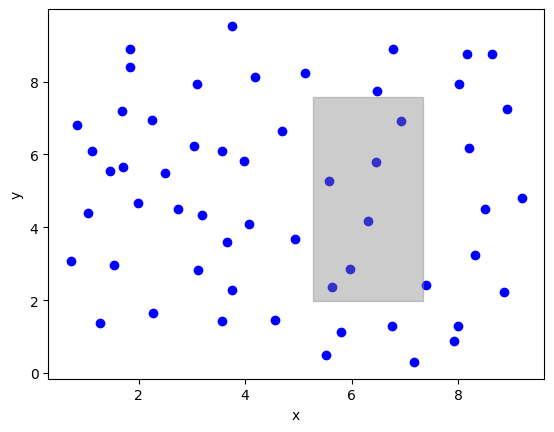

In [3]:
vis = Visualizer()
vis.add_point(points, color = 'blue')
vis.add_polygon([lower_left, (upper_right[0], lower_left[1]), upper_right, (lower_left[0], upper_right[1])], color = 'grey', alpha = 0.4)
vis.show()

Zwizualizujmy budowanie poszczególnych struktur.

W przypadku wizualizacji dla KD-tree przyjęto następujące oznaczenia:
- kolorem niebieskim oznaczono punkty z przestrzeni,
- kolorem szarym oznaczany jest aktualnie rozpatrywany obszar (do podziału),
- odcinkami pomarańczowymi oznaczono pionowe linie podziału,
- odcinkami zielonymi oznaczono poziome linie podziału.

KD-tree


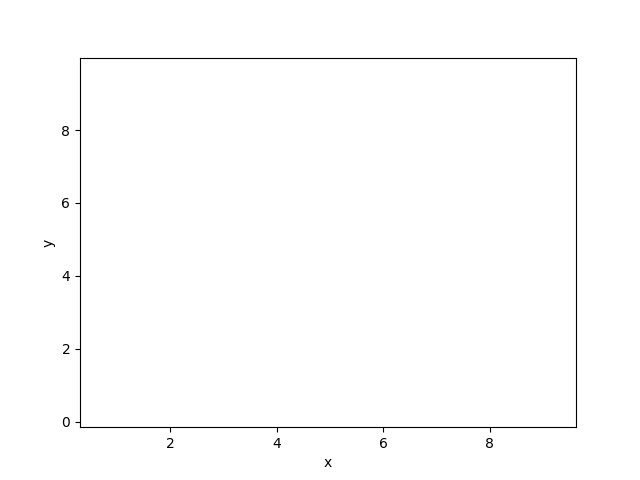

In [4]:
kd = KDtreeVisualizer(points)
print('KD-tree')
kd.show_build_visualization()

!!! Napisz tutaj coś o kolorach dla QuadTree i co jest czym, też sobie przerób kod poniżej jak chcesz

QuadTree


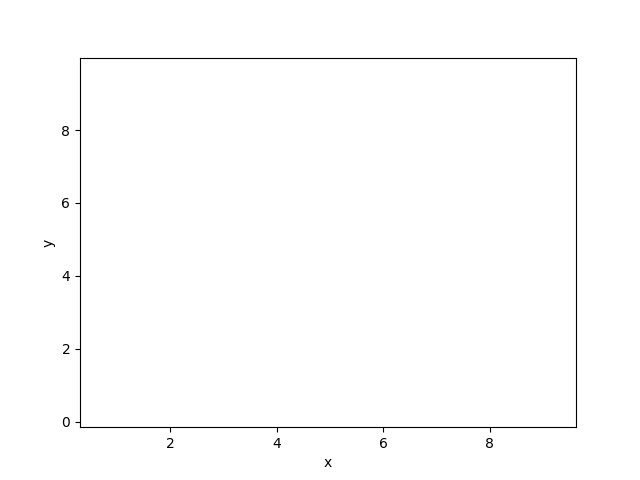

In [5]:
q = Quad(points)
print('QuadTree')
vis.clear()
vis.add_point(points, color = 'green')
q.draw(vis, 'blue')
vis.show_gif()

Następnie wykonamy zapytanie o punkty w zadanym obszarze, sprawdzimy czy zwrócone zbiory punktów są tożsame, oraz dokonamy wizualizację procesu wyszukiwania.

In [7]:
vis.clear()
vis.add_point(points, color = 'green')

kd_query = kd.query(lower_left, upper_right)
quad_query = q.graphic_query_range(lower_left, upper_right, vis, 'blue')

print(set(kd_query) == quad_query)

True


W wizualizacji wyszukiwania punktów w KD-tree:
- kolorem niebieskim oznaczono punkty,
- kolorem ciemnym niebieskim (półprzezroczystym) zaznaczono obszar, z którego punkty chcemy znaleźć,
- na różowo zaznaczono odcinki, które dzielą płaszczyznę
- na szaro zaznaczany jest obszar, który zostanie zawężony w celu dalszego wyszukiwania,
- kolorem zielonym oznaczane są punkty wyszukane w trakcie zapytania oraz obszary, w których te punkty się znajdowały (w przypadku gdy obszar w całości znajduje się w obszarze, z którego chcemy znaleźć punkty, to wszystkie punkty z niego są kolorowane na zielono),
- kolorem pomarańczowym oznaczane są odcinki, które pokazaują w jaki sposób w trakcie wyszukiwania rozpatrywane są i dzielone poszczególne obszary (czy algorytm rozpatruje stronę "lewą" czy "prawą").

KD-tree


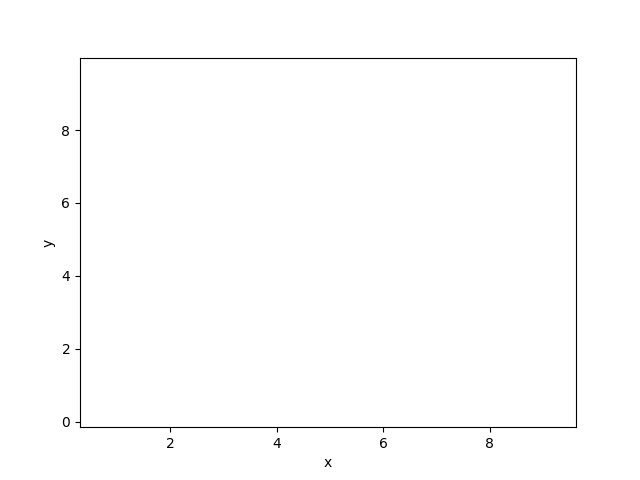

In [8]:
# KD-tree wizualizacja wyszukiwania
print('KD-tree')
kd.show_query_visualization()

!!! Tutaj też coś napisz o kolorach i co co oznacza

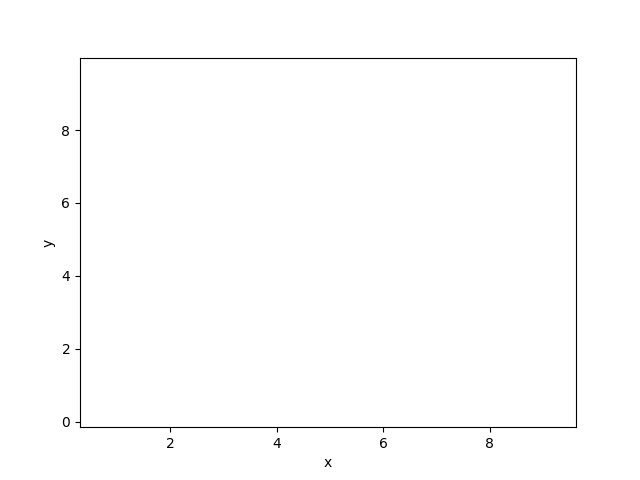

In [11]:
# QuadTree wizualizacja wyszukiwania
vis.show_gif(interval = 300)

Zwizualizujmy ostateczny wynik zapytania.
Na niebiesko zaznaczono punkty na płaszczyźnie, na szaro obszar, z którego punkty są szukane, a na czerwono znalezione punkty.

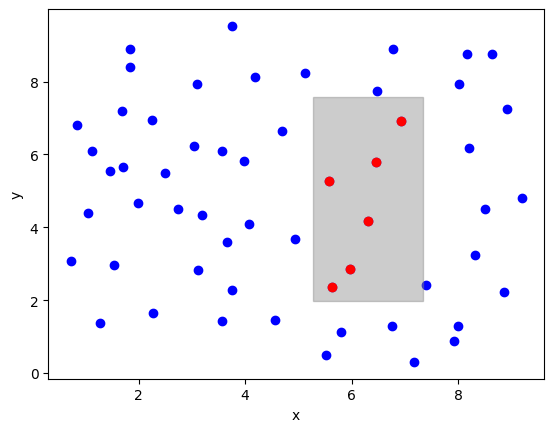

In [12]:
visualize_queried_points(points, lower_left, upper_right, kd_query)